# PETSc performance breakdown (3D MMS)

This notebook mirrors the 2D profiling but solves a 3D manufactured case (paper Eq. 6.3) on UnitCube meshes with Dirichlet BCs from the exact pressures.

It produces a CSV and a couple of summary plots.

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

from pathlib import Path
from typing import List
import matplotlib.pyplot as plt

from perphil.experiments.iterative_bench import Approach
from perphil.experiments.petsc_profiling_3d import run_perf_sweep_3d, save_perf_csv

RESULTS_PATH = Path("results-conforming-3d/petsc_profiling")
RESULTS_PATH.mkdir(parents=True, exist_ok=True)

## Parameters

In [ ]:
mesh_sizes: List[int] = [4, 8, 12, 16, 20, 32, 36, 40]
approaches: List[Approach] = [
    Approach.PLAIN_GMRES,
    Approach.GMRES_ILU,
    Approach.SS_GMRES,
    Approach.SS_GMRES_ILU,
    Approach.MONOLITHIC_MUMPS,
]
repeats = 3

## Run and collect

In [3]:
df = run_perf_sweep_3d(mesh_sizes, approaches, repeats=repeats, backend="events")
df.sort_values(["nx", "approach"])

[perf3d] nx=4 GMRES: iters=27, time_total=1.325e-02s, KSPSolve=5.102e-04s, flops_total=9.057e+06 (backend=events, repeats=3)
[perf3d] nx=4 GMRES + ILU PC: iters=6, time_total=1.203e-02s, KSPSolve=1.896e-04s, flops_total=5.548e+06 (backend=events, repeats=3)
[perf3d] nx=4 Scale-Splitting GMRES: iters=4, time_total=3.658e-02s, KSPSolve=2.153e-03s, flops_total=8.704e+06 (backend=events, repeats=3)
[perf3d] nx=4 Scale-Splitting GMRES + ILU PC: iters=4, time_total=3.367e-02s, KSPSolve=6.010e-04s, flops_total=1.179e+07 (backend=events, repeats=3)
[perf3d] nx=4 Scale-Splitting GMRES: iters=4, time_total=3.658e-02s, KSPSolve=2.153e-03s, flops_total=8.704e+06 (backend=events, repeats=3)
[perf3d] nx=4 Scale-Splitting GMRES + ILU PC: iters=4, time_total=3.367e-02s, KSPSolve=6.010e-04s, flops_total=1.179e+07 (backend=events, repeats=3)
[perf3d] nx=4 Monolithic LU with MUMPS: iters=1, time_total=1.249e-02s, KSPSolve=2.831e-04s, flops_total=4.519e+06 (backend=events, repeats=3)
[perf3d] nx=8 GMRES: 

,approach,nx,ny,dofs,num_cells,iterations,residual,time_total,time_total_repeats,time_SNESFunctionEval,...,mflops_SNESSolve,flops_MatMult,mflops_MatMult,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb,backend,repeats
0,GMRES,4,4,250,384,27,0.000013,0.013248,0.039745,0.005104,...,351.712458,8.435340e+05,5598.850407,0.0,0.0,9.056946e+06,284456.0,576.0,events,3
1,GMRES + ILU PC,4,4,250,384,6,0.000021,0.012030,0.036089,0.004764,...,248.979668,1.874520e+05,5227.474274,0.0,0.0,5.548308e+06,285224.0,0.0,events,3
4,Monolithic LU with MUMPS,4,4,250,384,1,0.000000,0.012490,0.037470,0.004635,...,185.322848,0.000000e+00,0.000000,0.0,0.0,4.519104e+06,294248.0,576.0,events,3
2,Scale-Splitting GMRES,4,4,250,384,4,0.000010,0.036579,0.109737,0.004764,...,49.714349,1.630830e+05,3464.911722,0.0,0.0,8.703567e+06,290024.0,1728.0,events,3
3,Scale-Splitting GMRES + ILU PC,4,4,250,384,4,0.000010,0.033674,0.101023,0.004470,...,65.486515,5.442330e+05,5267.654574,0.0,0.0,1.179183e+07,292904.0,1920.0,events,3
5,GMRES,8,8,1458,3072,190,0.000368,0.017947,0.053840,0.004784,...,4579.210977,4.193498e+07,5577.241600,0.0,0.0,2.668001e+08,298472.0,960.0,events,3
6,GMRES + ILU PC,8,8,1458,3072,8,0.057920,0.014659,0.043977,0.004711,...,1449.120089,1.711632e+06,5538.831935,0.0,0.0,4.710531e+07,301928.0,960.0,events,3
9,Monolithic LU with MUMPS,8,8,1458,3072,1,0.000000,0.020837,0.062512,0.005176,...,671.843584,0.000000e+00,0.000000,0.0,0.0,4.061417e+07,311336.0,576.0,events,3
7,Scale-Splitting GMRES,8,8,1458,3072,4,0.005216,0.069462,0.208386,0.004872,...,202.730549,1.117791e+06,3391.757520,0.0,0.0,7.779832e+07,307880.0,1152.0,events,3
8,Scale-Splitting GMRES + ILU PC,8,8,1458,3072,4,0.005216,0.040314,0.120942,0.004827,...,485.356138,5.309391e+06,5340.606847,0.0,0.0,1.063318e+08,307880.0,0.0,events,3


## Save CSV

In [4]:
save_perf_csv(df, str(RESULTS_PATH / "petsc_perf_breakdown_3d.csv"))
df.head()

,approach,nx,ny,dofs,num_cells,iterations,residual,time_total,time_total_repeats,time_SNESFunctionEval,...,mflops_SNESSolve,flops_MatMult,mflops_MatMult,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb,backend,repeats
0,GMRES,4,4,250,384,27,0.000013,0.013248,0.039745,0.005104,...,351.712458,843534.0,5598.850407,0.0,0.0,9056946.0,284456.0,576.0,events,3
1,GMRES + ILU PC,4,4,250,384,6,0.000021,0.012030,0.036089,0.004764,...,248.979668,187452.0,5227.474274,0.0,0.0,5548308.0,285224.0,0.0,events,3
2,Scale-Splitting GMRES,4,4,250,384,4,0.000010,0.036579,0.109737,0.004764,...,49.714349,163083.0,3464.911722,0.0,0.0,8703567.0,290024.0,1728.0,events,3
3,Scale-Splitting GMRES + ILU PC,4,4,250,384,4,0.000010,0.033674,0.101023,0.004470,...,65.486515,544233.0,5267.654574,0.0,0.0,11791830.0,292904.0,1920.0,events,3
4,Monolithic LU with MUMPS,4,4,250,384,1,0.000000,0.012490,0.037470,0.004635,...,185.322848,0.0,0.000000,0.0,0.0,4519104.0,294248.0,576.0,events,3


## Plots

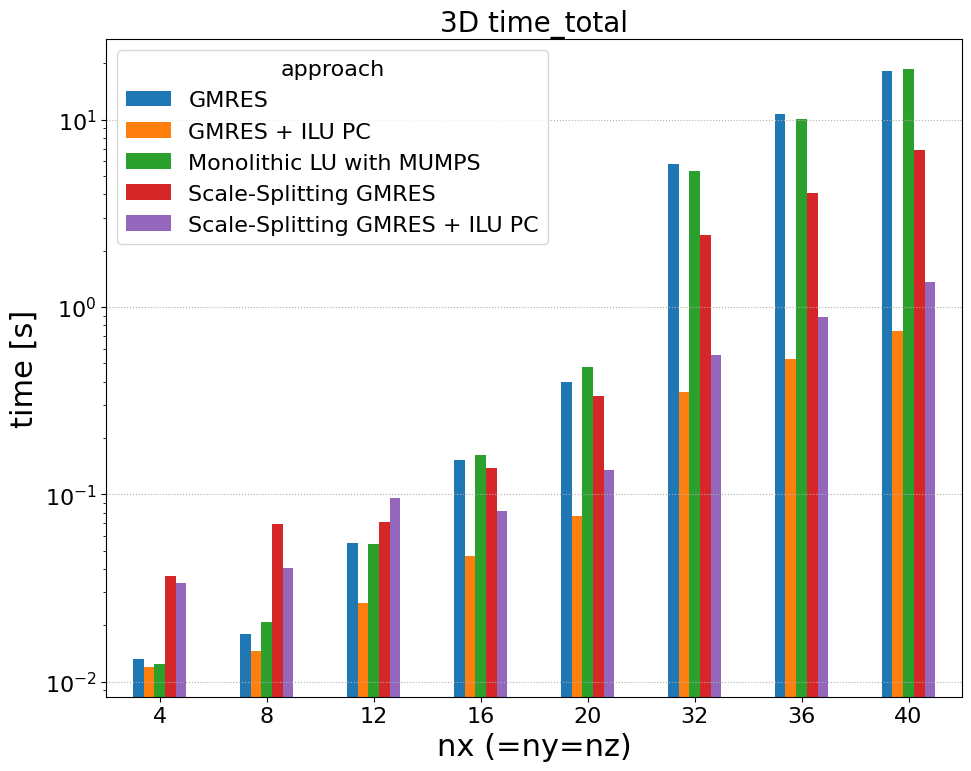

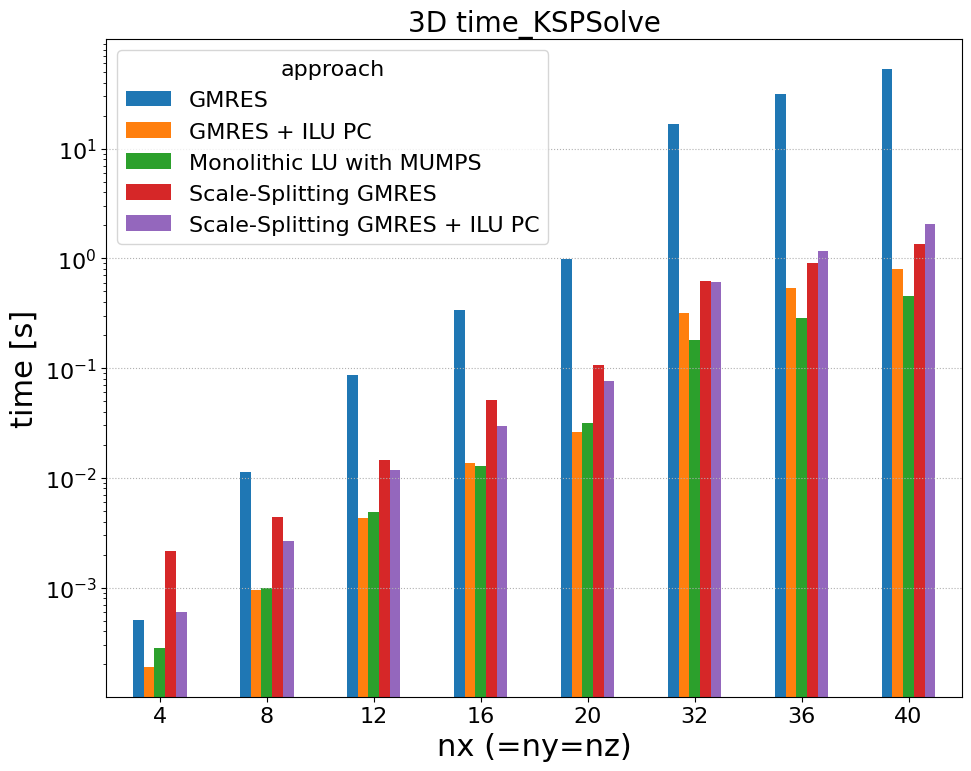

,approach,nx,ny,dofs,num_cells,iterations,residual,time_total,time_total_repeats,time_SNESFunctionEval,...,mflops_SNESSolve,flops_MatMult,mflops_MatMult,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb,backend,repeats
0,GMRES,4,4,250,384,27,0.000013,0.013248,0.039745,0.005104,...,351.712458,8.435340e+05,5598.850407,0.0,0.0,9.056946e+06,284456.0,576.0,events,3
1,GMRES + ILU PC,4,4,250,384,6,0.000021,0.012030,0.036089,0.004764,...,248.979668,1.874520e+05,5227.474274,0.0,0.0,5.548308e+06,285224.0,0.0,events,3
2,Scale-Splitting GMRES,4,4,250,384,4,0.000010,0.036579,0.109737,0.004764,...,49.714349,1.630830e+05,3464.911722,0.0,0.0,8.703567e+06,290024.0,1728.0,events,3
3,Scale-Splitting GMRES + ILU PC,4,4,250,384,4,0.000010,0.033674,0.101023,0.004470,...,65.486515,5.442330e+05,5267.654574,0.0,0.0,1.179183e+07,292904.0,1920.0,events,3
4,Monolithic LU with MUMPS,4,4,250,384,1,0.000000,0.012490,0.037470,0.004635,...,185.322848,0.000000e+00,0.000000,0.0,0.0,4.519104e+06,294248.0,576.0,events,3
5,GMRES,8,8,1458,3072,190,0.000368,0.017947,0.053840,0.004784,...,4579.210977,4.193498e+07,5577.241600,0.0,0.0,2.668001e+08,298472.0,960.0,events,3
6,GMRES + ILU PC,8,8,1458,3072,8,0.057920,0.014659,0.043977,0.004711,...,1449.120089,1.711632e+06,5538.831935,0.0,0.0,4.710531e+07,301928.0,960.0,events,3
7,Scale-Splitting GMRES,8,8,1458,3072,4,0.005216,0.069462,0.208386,0.004872,...,202.730549,1.117791e+06,3391.757520,0.0,0.0,7.779832e+07,307880.0,1152.0,events,3
8,Scale-Splitting GMRES + ILU PC,8,8,1458,3072,4,0.005216,0.040314,0.120942,0.004827,...,485.356138,5.309391e+06,5340.606847,0.0,0.0,1.063318e+08,307880.0,0.0,events,3
9,Monolithic LU with MUMPS,8,8,1458,3072,1,0.000000,0.020837,0.062512,0.005176,...,671.843584,0.000000e+00,0.000000,0.0,0.0,4.061417e+07,311336.0,576.0,events,3


In [ ]:
for metric in ("time_total", "time_KSPSolve"):
    pivot = df.pivot(index="nx", columns="approach", values=metric).sort_index()
    ax = pivot.plot(kind="bar", figsize=(10, 8), title=f"3D {metric}", rot=0, logy=True)
    ax.set_xlabel("nx (=ny=nz)")
    ax.set_ylabel("time [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"petsc_{metric}_3d_bar.png")
    plt.show()